In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy.stats import pearsonr

In [2]:
def autocorr(s):
    '''
    Calculate autocorrelation
    
    Parameters
    ----------
    s : pd.Series

    Returns
    -------
    float
    '''
    # drop missing observations
    s = s.dropna()
    
    # if enough data is available calculate and return autocorrelation, else return NAN
    if len(s) > 1:
        corr, pval = pearsonr(s[:-1], s[1:])
        return corr
    else:
        return np.NAN
    

def pareto_frontier(Xs, Ys, maxX = True, maxY = True): 
    '''
    Find frontier points code from ## pareto frontier code from 
    https://oco-carbon.com/metrics/find-pareto-frontiers-in-python/
    '''
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY


In [3]:
data1= pd.read_excel("C:/Users/abhis/Documents/UBC/Classes/PERIOD5/BAFI 580/A2/histretSP.xls",
                   sheet_name=1,skiprows=17, usecols="A:E", nrows= 93)

In [4]:
data2 = data1[data1["Year"] >= 1957 ]

In [5]:
data2

,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond
29,1957,-0.104574,0.032250,0.067970,-0.007189
30,1958,0.437200,0.017708,-0.020990,0.064301
31,1959,0.120565,0.033858,-0.026466,0.015743
32,1960,0.003365,0.028833,0.116395,0.066632
33,1961,0.266377,0.023542,0.020609,0.051000
...,...,...,...,...,...
88,2016,0.117731,0.003175,0.006906,0.103651
89,2017,0.216055,0.009308,0.028017,0.097239
90,2018,-0.042269,0.019392,-0.000167,-0.027626
91,2019,0.312117,0.015500,0.096356,0.153295


In [4]:
data

,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond
0,1928,0.438112,0.030800,0.008355,0.032196
1,1929,-0.082979,0.031600,0.042038,0.030179
2,1930,-0.251236,0.045500,0.045409,0.005398
3,1931,-0.438375,0.023100,-0.025589,-0.156808
4,1932,-0.086424,0.010700,0.087903,0.235896
...,...,...,...,...,...
88,2016,0.117731,0.003175,0.006906,0.103651
89,2017,0.216055,0.009308,0.028017,0.097239
90,2018,-0.042269,0.019392,-0.000167,-0.027626
91,2019,0.312117,0.015500,0.096356,0.153295


In [5]:
data.columns=['Year','Stocks','T.Bill','T.Bond', 'CorpB']

In [6]:
excess= data[['Stocks','T.Bond','CorpB']].sub(data['T.Bill'], axis= 'index')



In [7]:
excess

,Stocks,T.Bond,CorpB
0,0.407312,-0.022445,0.001396
1,-0.114579,0.010438,-0.001421
2,-0.296736,-0.000091,-0.040102
3,-0.461475,-0.048689,-0.179908
4,-0.097124,0.077203,0.225196
...,...,...,...
88,0.114556,0.003731,0.100476
89,0.206746,0.018709,0.087931
90,-0.061660,-0.019559,-0.047018
91,0.296617,0.080856,0.137795


In [8]:
summary_stats = excess.aggregate(['mean','std','skew','kurt',autocorr]).T
summary_stats['sharpe ratio'] = summary_stats['mean']/data[['Stocks','T.Bond','CorpB']].std()


In [9]:
summary_stats

,mean,std,skew,kurt,autocorr,sharpe ratio
Stocks,0.082800,0.198267,-0.333712,0.026555,0.007612,0.424874
T.Bond,0.018514,0.074588,0.348059,0.274504,-0.126697,0.241804
CorpB,0.038918,0.078627,-0.099932,0.199831,0.190329,0.517250


In [10]:
excess.corr()

,Stocks,T.Bond,CorpB
Stocks,1.000000,0.022916,0.441502
T.Bond,0.022916,1.000000,0.600563
CorpB,0.441502,0.600563,1.000000


In [11]:
def weighted_portfolio(w):
    weighted_data=excess[['Stocks','T.Bond','CorpB']] *w
    return weighted_data.sum(axis=1)
def var_of_portfolio(w):
    return weighted_portfolio(w).var()
      

x0 = [0.33,0.34,0.34]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = ((0,1),(0,1),(0,1))
res = scipy.optimize.minimize(var_of_portfolio,x0 , method='SLSQP', bounds=bnds ,constraints=cons)
weights=res.x
pd.DataFrame([weights], columns= ['w1','w2','w3'])

,w1,w2,w3
0,0.036245,0.529594,0.434161


In [12]:
var=res.fun
print('variance',var)

variance 0.004626610298016865


In [13]:
min_var_port= weighted_portfolio(weights)

In [14]:
summary_stats1 = min_var_port.aggregate(['mean','std','skew','kurt',autocorr]).T
summary_stats1

mean        0.029703
std         0.068019
skew       -0.011916
kurt        0.036008
autocorr    0.088796
dtype: float64

In [15]:
summary_stats1['sharpe ratio'] = summary_stats1['mean']/summary_stats1['std']


In [16]:
summary_stats1

mean            0.029703
std             0.068019
skew           -0.011916
kurt            0.036008
autocorr        0.088796
sharpe ratio    0.436683
dtype: float64

In [17]:
def neg_sharpe_ratio_of_portfolio(w):
    return  -1* weighted_portfolio(w).mean()/weighted_portfolio(w).std()
  
x0 = [0.33,0.34,0.34]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = ((0,1),(0,1),(0,1))
res2 = scipy.optimize.minimize(neg_sharpe_ratio_of_portfolio,x0 , method='SLSQP', bounds=bnds ,constraints=cons)
print((res2.fun)*-1)


0.5426218041114668


In [18]:
res2

     fun: -0.5426218041114668
     jac: array([-6.88955188e-05,  4.74452972e-05,  1.60261989e-05])
 message: 'Optimization terminated successfully'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.203806 , 0.0411608, 0.7550332])

In [19]:
weights2= res2.x

In [20]:
min_var_port2= weighted_portfolio(weights2)

summary_stats2 = min_var_port2.aggregate(['mean','std','skew','kurt',autocorr]).T
summary_stats2

summary_stats2['sharpe ratio'] = summary_stats2['mean']/summary_stats2['std']

table= pd.concat([summary_stats1,summary_stats2], axis=1).rename(columns={0:'MVP', 1:'MSRP'})

In [21]:
table

,MVP,MSRP
mean,0.029703,0.047022
std,0.068019,0.086656
skew,-0.011916,-0.487778
kurt,0.036008,0.226359
autocorr,0.088796,0.107191
sharpe ratio,0.436683,0.542622


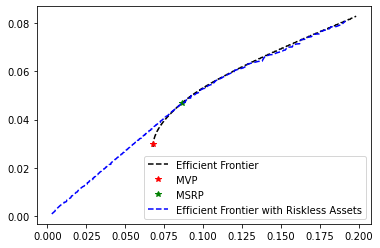

In [74]:
def mean_std_portfolio(w):
    df = weighted_portfolio(w)
    return [df.std(),df.mean()]

numbers = np.array([(i,j,k) for i in np.linspace(0,1,101) for j in np.linspace(0,1,101) for k in np.linspace(0,1,101)])
numbers = numbers[numbers.sum(axis=1)==1]

results = []

for w in numbers:
    results.append(mean_std_portfolio(w))

results=pd.DataFrame(results,columns =['std','mean'])
results=pareto_frontier(results['std'].values.tolist(),results['mean'].values.tolist(),False)



plt.plot(results[0],results[1],'--',color = 'black',label = 'Efficient Frontier')
plt.plot(mean_std_portfolio(weights)[0],mean_std_portfolio(weights)[1], '*', color = 'red',label = 'MVP')
plt.plot(mean_std_portfolio(weights2)[0],mean_std_portfolio(weights2)[1], '*', color = 'green',label = 'MSRP')



# results = []
# for w in [weights2*(i/10) for i in range(0,16)]:
#     results.append(mean_std_portfolio(w))

numbers = np.array([(i,j,k) for i in np.linspace(0,1,101) for j in np.linspace(0,1,101) for k in np.linspace(0,1,101)])

numbers = numbers[numbers.sum(axis=1)<=1]
numbers=numbers[np.random.choice(np.arange(numbers.shape[0]),replace = False, size = 5200)]
results = []
for w in numbers:
    results.append(mean_std_portfolio(w))

results=pd.DataFrame(results,columns =['std','mean'])
results=pareto_frontier(results['std'].values.tolist(),results['mean'].values.tolist(),False)
plt.plot(results[0],results[1], '--', color = 'blue',label = 'Efficient Frontier with Riskless Assets')


plt.legend()
plt.show()




In [75]:
def weighted_portfolio(w):
    weighted_data=excess[['Stocks','T.Bond']] *w
    return weighted_data.sum(axis=1)


def var_of_portfolio(w):
    return weighted_portfolio(w).var()

x0 = [0.5,0.5]
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})
bnds = ((0,1),(0,1))  
  

res3 = scipy.optimize.minimize(var_of_portfolio,x0 , method='SLSQP', bounds=bnds ,constraints=cons)




summary_stats3 = weighted_portfolio(res3.x).aggregate(['mean','std','skew','kurt',autocorr]).T

summary_stats3['sharpe ratio'] = summary_stats3['mean']/summary_stats3['std']

  
def neg_sharpe_ratio_of_portfolio(w):
    return  -1* weighted_portfolio(w).mean()/weighted_portfolio(w).std()
  

res4 = scipy.optimize.minimize(neg_sharpe_ratio_of_portfolio,x0 , method='SLSQP', bounds=bnds ,constraints=cons)

summary_stats4 = weighted_portfolio(res4.x).aggregate(['mean','std','skew','kurt',autocorr]).T
summary_stats4['sharpe ratio'] = summary_stats4['mean']/summary_stats3['std']

table2=pd.concat([summary_stats3,summary_stats4],axis=1)
table2.columns = ['MVP 2 assets','MSRP 2 assets']
table3 = table.join(table2)
table3

,MVP,MSRP,MVP 2 assets,MSRP 2 assets
mean,0.029703,0.047022,0.026114,0.043774
std,0.068019,0.086656,0.070326,0.091000
skew,-0.011916,-0.487778,0.199226,-0.246217
kurt,0.036008,0.226359,0.003380,-0.130008
autocorr,0.088796,0.107191,-0.069093,0.030082
sharpe ratio,0.436683,0.542622,0.371320,0.622434


In [76]:
def weighted_portfolio(w):
    weighted_data=excess[['Stocks','T.Bond','CorpB']] *w
    return weighted_data.sum(axis=1)
def mean_std_portfolio(w):
    df = weighted_portfolio(w)
    return [df.std(),df.mean()]

numbers = np.array([(i,j,k) for i in np.linspace(0,1,101) for j in np.linspace(0,1,101) for k in np.linspace(0,1,101)])

numbers = np.array([i for i in numbers if sum(i)==1]).round(3)

results = []

for w in numbers:
    results.append(mean_std_portfolio(w))

results=pd.DataFrame(results,columns =['std','mean'])
  

results=pareto_frontier(results['std'].values.tolist(),results['mean'].values.tolist(),False)

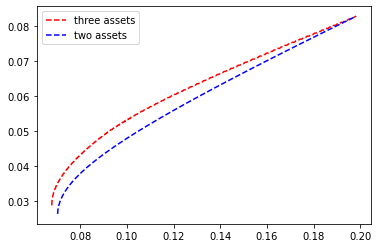

In [77]:
numbers = [(i,j) for i in np.linspace(0,1,101) for j in np.linspace(0,1,101)]
numbers = np.array([i for i in numbers if sum(i)==1]).round(3)

results2 = []

def weighted_portfolio(w):
    weighted_data=excess[['Stocks','T.Bond']] *w
    return weighted_data.sum(axis=1)

def mean_std_portfolio(w):
    df = weighted_portfolio(w)
    return [df.std(),df.mean()]


for w in numbers:
    results2.append(mean_std_portfolio(w))

results2=pd.DataFrame(results2,columns =['std','mean'])
  

results2=pareto_frontier(results2['std'].values.tolist(),results2['mean'].values.tolist(),False)

plt.plot(results[0],results[1],'--', color = 'red',label = 'three assets')
plt.plot(results2[0],results2[1],'--', color = 'blue',label = 'two assets')
plt.legend()
plt.show()